## Apache Logs

This is a study of analyzing apache logs, looking for normal and abnormal usage.

Prerequisites
 - python 3.x
 - python packages
   - pip3 install pandas
   - pip3 install scikit-learn
   - pip3 install matplotlib

Sample data
- http://indeedeng.github.io/imhotep/files/nasa_19950801.tsv (saved in 'rawData/nasa_19950801.tsv')
- http://indeedeng.github.io/imhotep/files/nasa_19950630.22-19950728.12.tsv.gz
- http://indeedeng.github.io/imhotep/files/nasa_19950731.22-19950831.22.tsv.gz

---

### Read Data File And View Headings and Sample Data
This reads in the datafile and shows the headings of each column.


In [66]:
import pandas as pd

apache_log_path = 'rawData/nasa_19950801.tsv'
apache_log_data = pd.read_csv(apache_log_path, sep='\t', header=0)
print(apache_log_data.columns)
print(apache_log_data.head())

Index(['host', 'logname', 'time', 'method', 'url', 'response', 'bytes',
       'referer', 'useragent'],
      dtype='object')
                        host logname       time method  \
0     pppa006.compuserve.com       -  807256800    GET   
1         vcc7.langara.bc.ca       -  807256804    GET   
2     pppa006.compuserve.com       -  807256806    GET   
3  thing1.cchem.berkeley.edu       -  807256870    GET   
4              202.236.34.35       -  807256881    GET   

                                                 url  response  bytes  \
0                            /images/launch-logo.gif       200   1713   
1                    /shuttle/missions/missions.html       200   8677   
2            /history/apollo/images/apollo-logo1.gif       200   1173   
3  /shuttle/missions/sts-70/sts-70-day-03-highlig...       200   4705   
4                                    /whats-new.html       200  18936   

   referer  useragent  
0      NaN        NaN  
1      NaN        NaN  
2      NaN    

Looks like the 'referer' and 'useragent' columns have been redacted from our sample data.

### Data Dictionary
 | Column     | Description |
 |------------|:-----------:|
 | host       | The hostname or IP address making the request to the website |
 | logname    | not a populated field |
 | time       | integer version of unix timestamp |
 | method     | HTTP method for the call |
 | url        | path to the file being requested |
 | response   | HTTP response code for the call |
 | bytes      | Number of bytes returned for the request |
 | referer    | not a populated field |
 | useragent  | not a populated field |

---
## Initial Visualization
### Generate a histogram of response codes
Show the list of response codes in this data, then see the raw numbers for how frequently each exists in the loaded data and generate a graph of this data

In [10]:
responses = apache_log_data.response
unique_responses = responses.unique()
print(unique_responses)

[200 304 302 404]


In [12]:
histogram_responses = responses.value_counts()
print(histogram_responses)

200    27972
304     2421
302      355
404      221
Name: response, dtype: int64


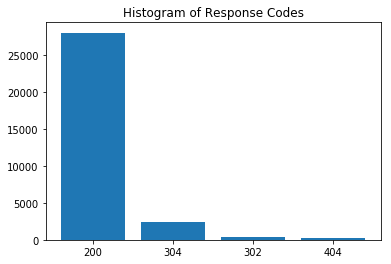

In [62]:
import matplotlib.pyplot as plt
import numpy as np

unique_responses_count = (len(unique_responses))
x = np.arange(unique_responses_count)
plt.title('Histogram of Response Codes')
plt.bar(x,histogram_responses)
plt.xticks(x, unique_responses)
plt.show()

---
### Visualize Response Size (in Bytes)

Because we have more data than the response codes, we'll need to decide how to bucket this data. To do that, we'll look at some general stats and then create a histogram graph.

In [43]:
responseinbytes = apache_log_data.bytes
print("Maximum response size =", max(responseinbytes))
print("Average response size =", responseinbytes.mean())
print("Median response size =", responseinbytes.median())

Maximum response size = 1269716
Average response size = 15563.96612741774
Median response size = 2322.0


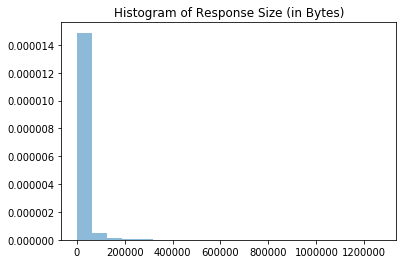

In [63]:
import matplotlib.mlab as mlab

num_bins = 20
plt.title('Histogram of Response Size (in Bytes)')
n, bins, patches = plt.hist(responseinbytes, num_bins, density=1, alpha=0.5)

### That histogram looks very skewed :(
We'll need to look at creating a derived field that can show this data better.

Since this is skewed-left, we'll use use the 'log-normal' translation which takes the log of the x values to get more of a normal curve. Since we have some responses with 0 bytes returned, we need to add one to each of our 'x' values so that the log function does not generate an error.

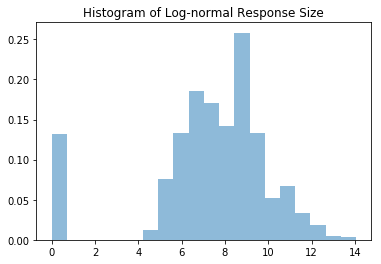

In [64]:
import math

responseinbytes_logx = apache_log_data.loc[:,'bytes']
responseinbytes_logx = responseinbytes_logx.apply(lambda x: math.log(x + 1))
num_bins = 20
plt.title('Histogram of Log-normal Response Size')
n, bins, patches = plt.hist(responseinbytes_logx, num_bins, density=1, alpha=0.5)

